## Importing the dataset

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Data Cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Preprocessing

In [11]:
import plotly.express as px

In [12]:
fig = px.histogram(df, x='valence', nbins=10, title='Histogram of Valence')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
df['valence'].describe()

count    113999.000000
mean          0.474066
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

In [14]:
def classify_valence(valence):
    if valence <= 0.5:
        return 'low'
    else:
        return 'high'

In [15]:
df['target'] = df['valence'].apply(classify_valence)

In [16]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [17]:
df_songs = df.drop(['Unnamed: 0', 'track_id'], axis=1)

## Features Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
def label_encode_df(df, cols):
    le = LabelEncoder()
    for col in cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    return df

In [20]:
cols_to_encode = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encode_df(df_songs, cols_to_encode)
df_songs.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


## Features Analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

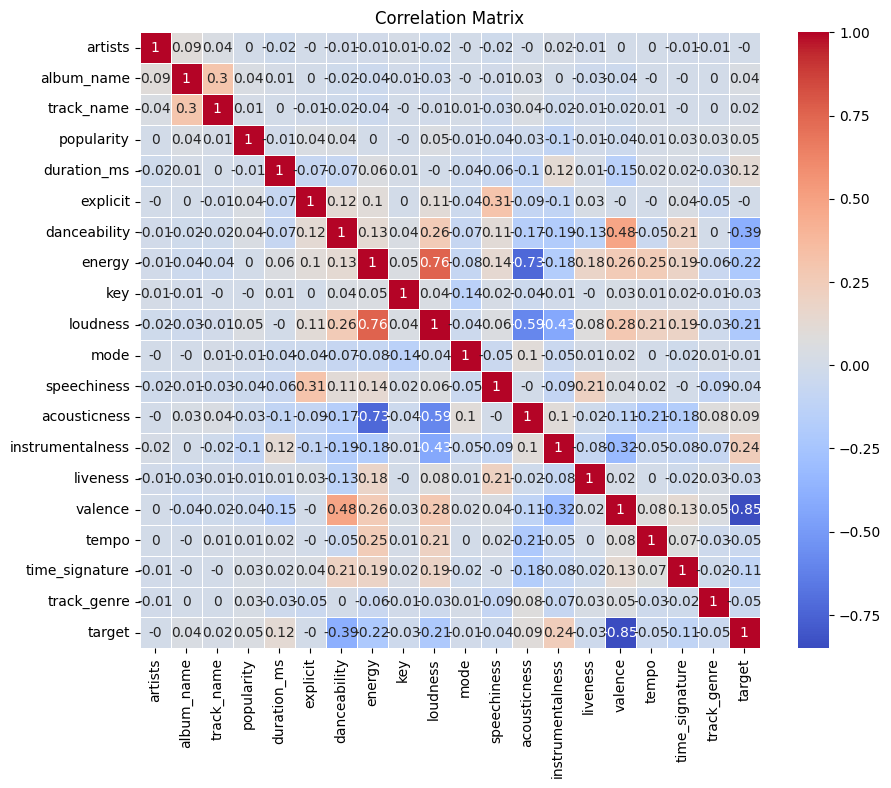

In [22]:
corr_matrix = df_songs.corr().round(2)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

## Target Analysis

In [23]:
round(df_songs['target'].value_counts(normalize=True) * 100, 2)

target
1    54.37
0    45.63
Name: proportion, dtype: float64

## Data split between Train and Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_songs.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [26]:
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre', 'target']
X = df_songs[features].drop('target', axis=1)
y = df_songs['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [28]:
display(f'X_train shape: {X_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (91199, 9)'

'X_test shape: (22800, 9)'

'y_train shape: (91199,)'

'y_test shape: (22800,)'

## Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

## Models

In [31]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

### Logistic Regression

AUC 0.7964430095372972

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



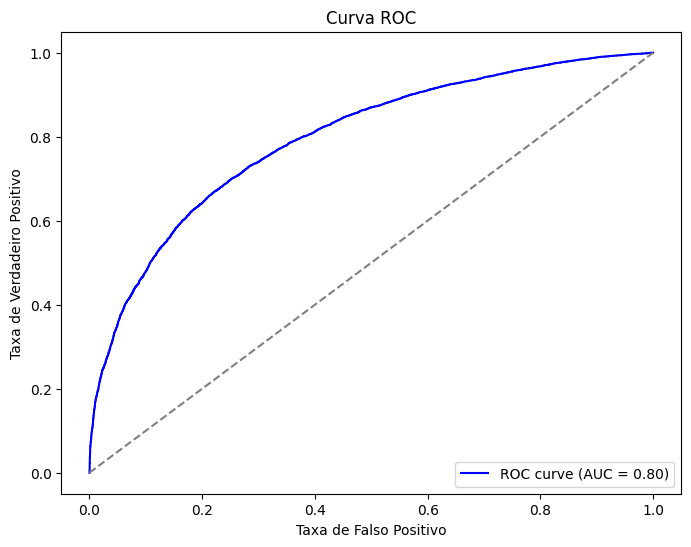

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
roda_modelo(lr_model)

### K-Nearest Neighbors

AUC 0.8125217096963184

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.77      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



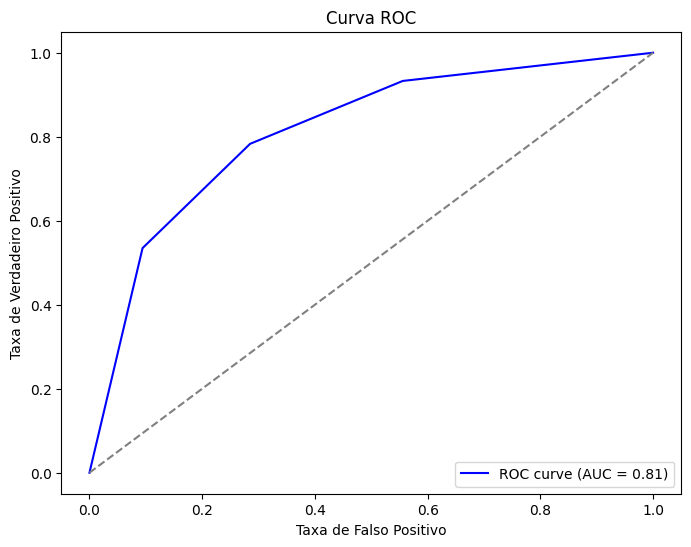

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
roda_modelo(knn_model)

### Random Forest

AUC 0.8309006092931895

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     10403
           1       0.77      0.77      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



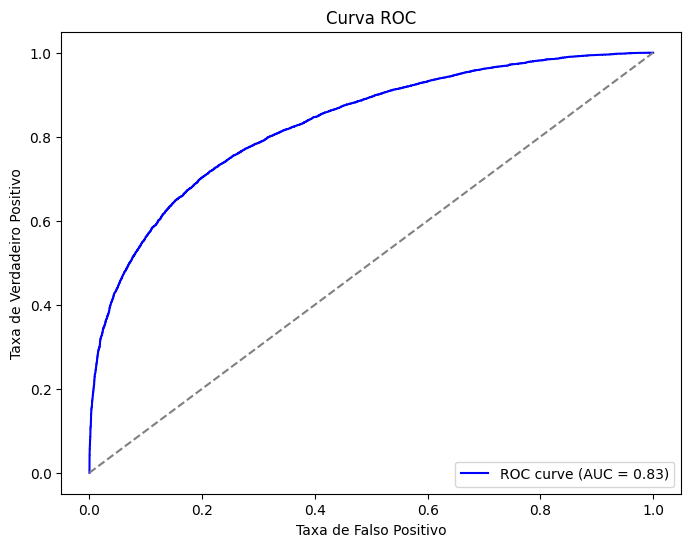

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=7, n_estimators=100)
roda_modelo(rf_model)

### Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print(f'Melhores hiperparametros: {rf_params}')

Melhores hiperparametros: {'max_depth': 15, 'n_estimators': 200}


AUC 0.9057762677914056

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     10403
           1       0.83      0.84      0.84     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



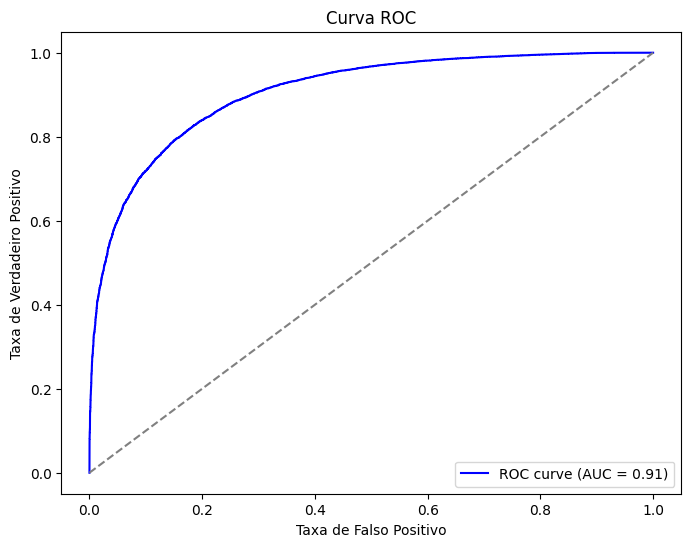

In [36]:
rf_model = RandomForestClassifier(max_depth=15, n_estimators=300)
roda_modelo(rf_model)

## Classifying new inputs

In [37]:
import numpy as np

In [38]:
new_data = pd.read_excel('novos_dados.xlsx', sheet_name='Planilha1')
original_data = pd.read_excel('novos_dados.xlsx', sheet_name='Planilha1')

In [39]:
columns = ['track_genre']
label_encode_df(new_data, columns)
new_data = scaler.transform(new_data)

In [40]:
predictions = rf_model.predict(new_data)

def map_values(values):
    results = []
    for value in values:
        if value == 0:
            results.append('Música Agitada')
        else:
            results.append('Música Lenta')
    return np.array(results)

In [41]:
original_data['target'] = map_values(predictions)
original_data

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música Agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música Lenta
